In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DBConnection import DBConnection 
%matplotlib inline

# Collecting the data from database

In [111]:
db = DBConnection()
conn = db.get_connector()
cur = conn.cursor()    

In [112]:
cur.execute("SELECT * FROM ARTISTS")
artist_colnames = [desc[0] for desc in cur.description]
res = cur.fetchall()

artist_df = pd.DataFrame(res, columns=artist_colnames)

In [113]:
genre_dict={'Portishead': 'Trip-Hop', 
            'Pink Floyd': 'Art-Rock',
            'Radiohead': 'Alternative Rock',
            'Massive Attack': 'Trip-Hop',
            'Tricky': 'Trip-Hop',
            'trentemøller':'Electronica',
            'Motörhead': 'Heavy Metal',
            'TOOL': 'Progressive Rock',
            'Björk':'Art-pop',
            'Hooverphonic':'Trip-Hop',
            'Moloko':'Electronica',
            'Morphine': 'Blues-Rock',
            'Faithless': 'Electronic',
            'Archive': 'Trip-Hop',
            'Groove Armada':'Electronic',
            'Testament':'Trash Metal',
            'Incubus':'Alternative Rock',
            'Jimi Hendrix': 'Rock',
            'Queens of the Stone Age':'Alternative Rock',
            'Alice In Chains': 'Grunge',
            'Pearl Jam': 'Grunge',
            'Nine Inch Nails': 'Industrial Rock',
            'Placebo': 'Alternative Rock',
            'David Bowie': 'Glam Rock',
            'Black Sabbath': 'Heavy Metal',
            'A Perfect Circle': 'Alternative Rock'}

In [114]:
artist_df['genre'] = artist_df['artist_name'].map(genre_dict)

In [115]:
artist_df.head()

,artist_id,artist_name,genre
0,6liAMWkVf5LH7YR9yfFy1Y,Portishead,Trip-Hop
1,0k17h0D3J5VfsdmQ1iZtE9,Pink Floyd,Art-Rock
2,4Z8W4fKeB5YxbusRsdQVPb,Radiohead,Alternative Rock
3,6FXMGgJwohJLUSr5nVlf9X,Massive Attack,Trip-Hop
4,6hhA8TKRNryM8FNzqCqdDO,Tricky,Trip-Hop


<AxesSubplot:>

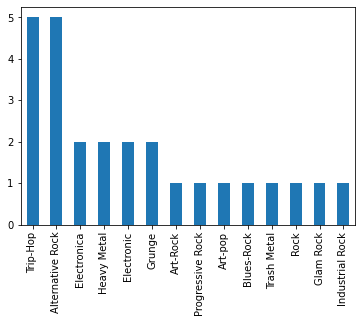

In [116]:
artist_df['genre'].value_counts().plot(kind='bar')

In [117]:
cur.execute("SELECT * FROM tracks t \
            JOIN albums a on t.album_id = a.album_id")
# Collecting column names from database
colnames = [desc[0] for desc in cur.description]

# Creating Dataframe
res = cur.fetchall()
dataframe = pd.DataFrame(res, columns = colnames)
dataframe = dataframe.merge(artist_df, on=['artist_id'], how='left')
dataframe = dataframe.loc[:,~dataframe.columns.duplicated()]
dataframe = dataframe.dropna(subset=['genre'], how='all')

In [118]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5617 entries, 0 to 5868
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5617 non-null   object
 1   name              5617 non-null   object
 2   track_number      5617 non-null   int64 
 3   uri               5617 non-null   object
 4   album_id          5617 non-null   object
 5   artist_id         5617 non-null   object
 6   danceability      5617 non-null   object
 7   energy            5617 non-null   object
 8   key               5617 non-null   int64 
 9   loudness          5617 non-null   object
 10  mode              5617 non-null   int64 
 11  speechiness       5617 non-null   object
 12  acousticness      5617 non-null   object
 13  instrumentalness  5617 non-null   object
 14  liveness          5617 non-null   object
 15  valence           5617 non-null   object
 16  tempo             5617 non-null   object
 17  album_name    

In [119]:
dataframe.columns

Index(['id', 'name', 'track_number', 'uri', 'album_id', 'artist_id',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'album_name', 'album_type', 'release_date', 'total_tracks', 'type',
       'artist_name', 'genre'],
      dtype='object')

In [120]:
feature_list = ['danceability', 'energy', 'loudness', 'speechiness','acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo']

for i in feature_list:
    dataframe[i] = dataframe[i].astype(float)

In [121]:
dataframe.groupby('genre')[feature_list].mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
genre,,,,,,,,,
Alternative Rock,0.440618,0.713226,-7.792605,0.067614,0.179759,0.220163,0.293251,0.347599,127.315621
Art-Rock,0.362766,0.430668,-14.719547,0.056948,0.342863,0.289433,0.405269,0.238981,115.345740
Art-pop,0.384032,0.424598,-12.016723,0.081128,0.521580,0.102841,0.251199,0.216577,114.934957
Blues-Rock,0.486937,0.420905,-14.153453,0.079915,0.454801,0.387690,0.284455,0.412135,106.150189
Electronic,0.660874,0.712073,-8.971821,0.064688,0.114004,0.397446,0.268650,0.461786,122.172598
Electronica,0.715634,0.658600,-9.681768,0.083561,0.162216,0.258800,0.153149,0.624324,126.863183
Glam Rock,0.475903,0.666570,-10.115826,0.081047,0.244040,0.085300,0.505567,0.461841,123.636007
Grunge,0.402849,0.751597,-7.469054,0.062193,0.117286,0.095805,0.330650,0.381737,128.396173
Heavy Metal,0.319517,0.902233,-7.148696,0.099303,0.063508,0.231314,0.449036,0.272571,127.122450


In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import seaborn as sns

In [123]:
mms = MinMaxScaler()
dataframe[feature_list] = mms.fit_transform(dataframe[feature_list])

In [124]:
pc_matrix =  PCA(2).fit_transform(dataframe[feature_list])

for ind,val in enumerate(pc_matrix):
    dataframe.at[ind,'pc_1'] = val[0]
    dataframe.at[ind,'pc_2'] = val[1]

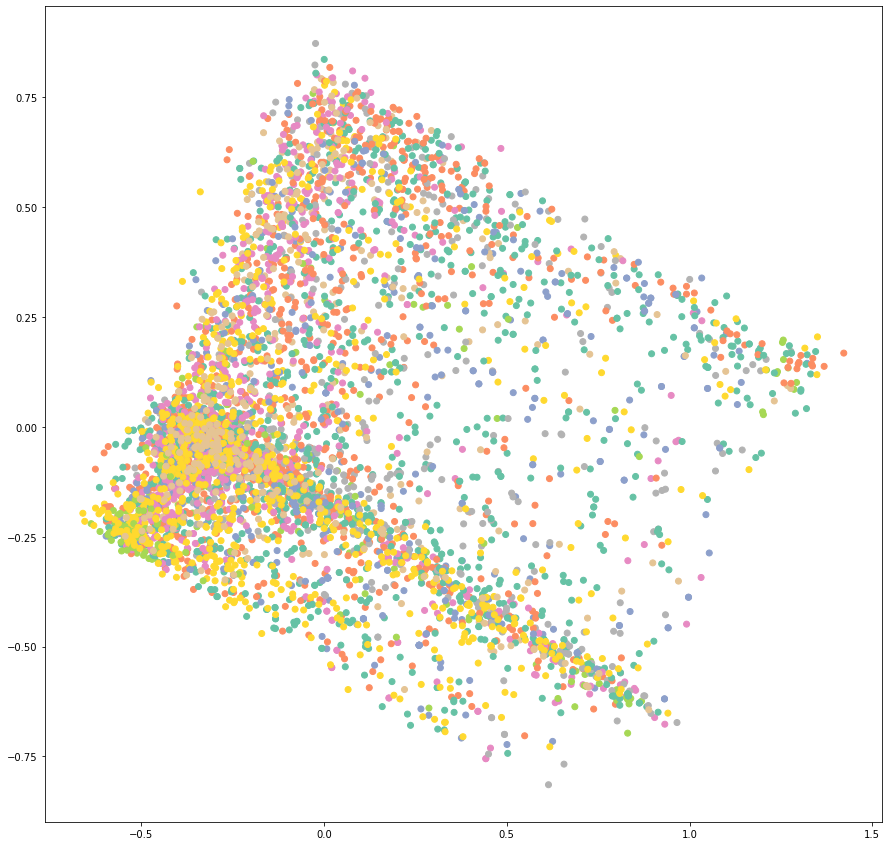

In [148]:
color_labels = dataframe['genre'].unique()
rgb_values = sns.color_palette("Set2", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

fig, ax = plt.subplots(figsize=(15, 15))
c = dataframe['genre'].map(color_map)

ax.scatter(dataframe['pc_1'], dataframe['pc_2'], c=c)

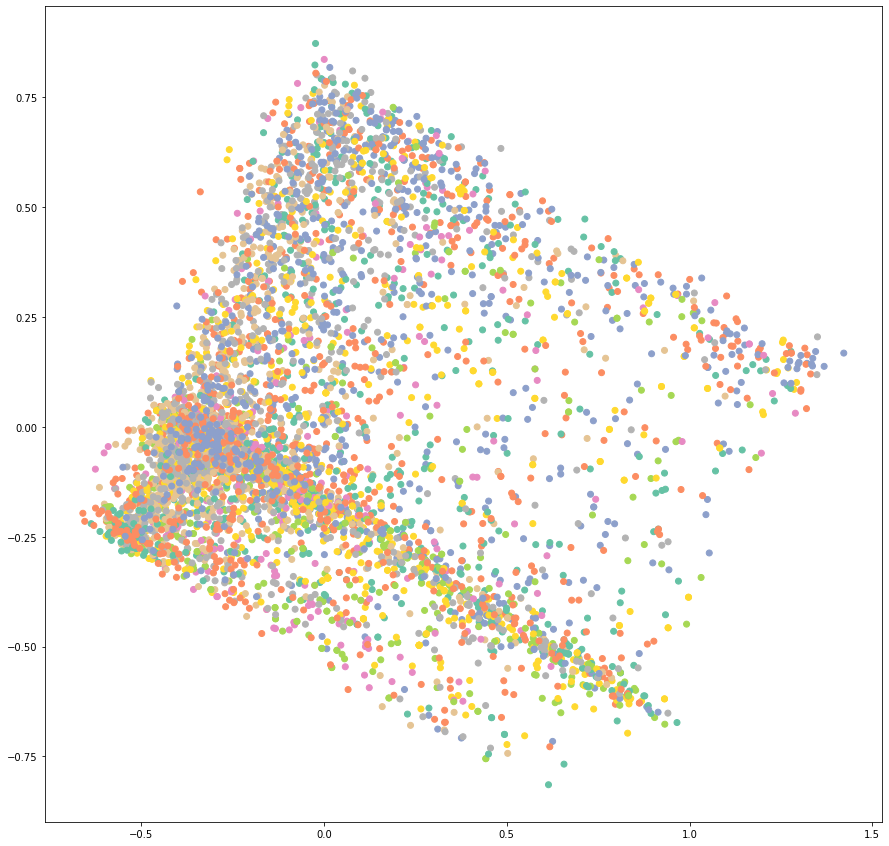

In [147]:
color_labels = dataframe['artist_name'].unique()
rgb_values = sns.color_palette("Set2", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

fig, ax = plt.subplots(figsize=(15, 15))
c = dataframe['artist_name'].map(color_map)

ax.scatter(dataframe['pc_1'], dataframe['pc_2'], c=c)

# PreProcessing

In [269]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [270]:
mms = MinMaxScaler()
dataframe[feature_list] = mms.fit_transform(dataframe[feature_list])

In [338]:
X = dataframe[feature_list]
y = dataframe['genre']

In [363]:
pc = PCA(2)
X_pca = pc.fit_transform(X)

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=42, test_size=0.4)

# Decision Tree Classifier using genre as target

In [344]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

In [346]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [347]:
clf.score(X_train, y_train)

1.0

In [348]:
clf.score(X_test, y_test)

0.20382732532265244

In [349]:
y_pred = OneVsRestClassifier(LinearSVC()).fit(X_train, y_train).predict(X_test)

In [350]:
cross_val_score(OneVsRestClassifier(LinearSVC()),
                X_test,
                y_test,
                cv=10)

array([0.22666667, 0.25777778, 0.21333333, 0.22666667, 0.22222222,
       0.24      , 0.2       , 0.26339286, 0.23660714, 0.21428571])

# KMeans for understanding the patterns

In [160]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

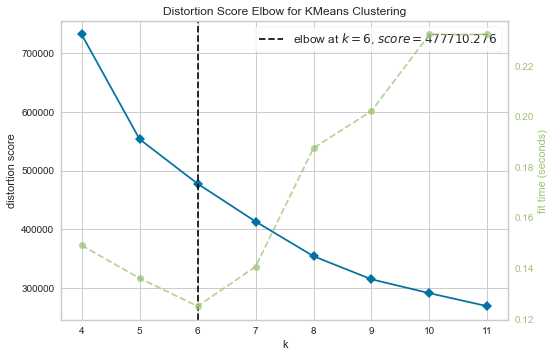

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [162]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(4,12))

visualizer.fit(X)
visualizer.show()

In [163]:
model = KMeans(n_clusters=6, random_state=0)

In [164]:
y_pred = model.fit_predict(X)

In [165]:
dataframe['pred'] = y_pred

<AxesSubplot:>

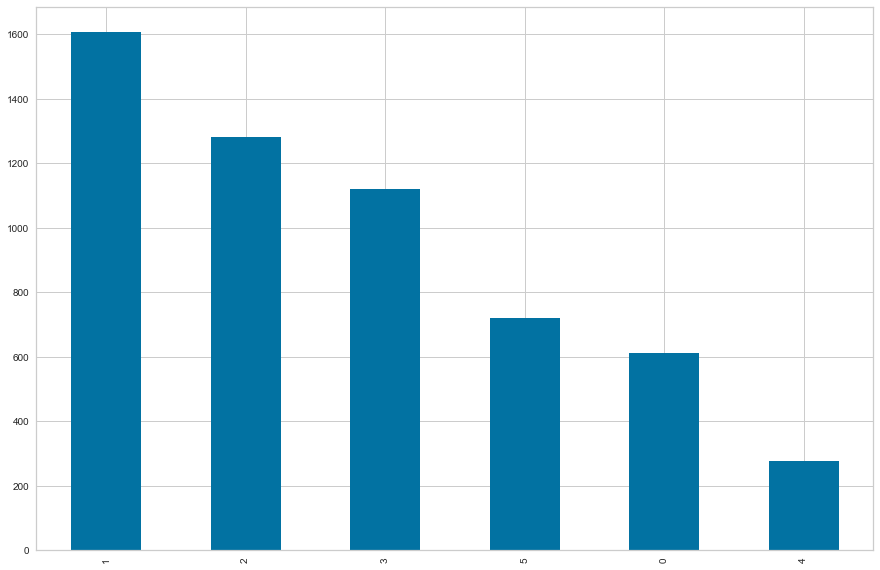

In [166]:
dataframe['pred'].value_counts().plot(kind='bar', figsize=(15,10))

<AxesSubplot:ylabel='genre,pred'>

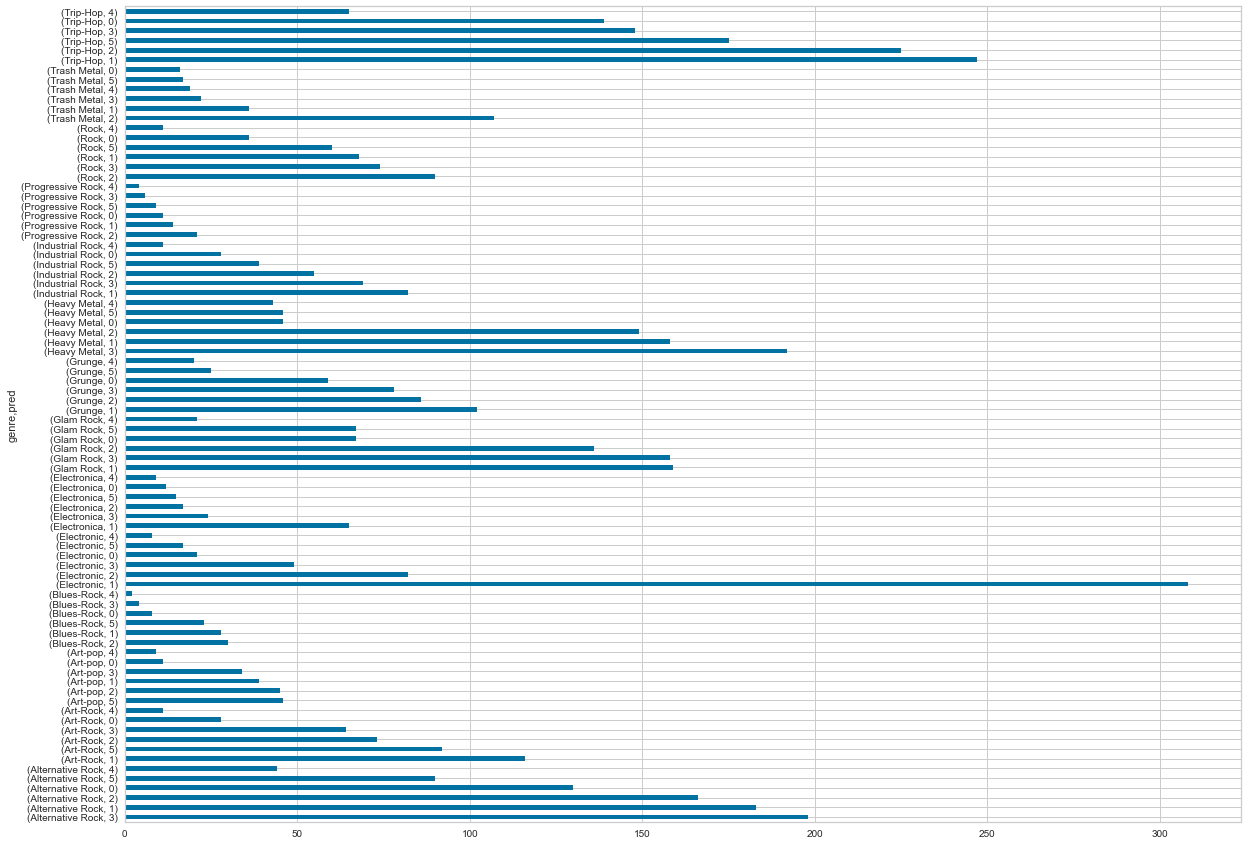

In [179]:
dataframe.groupby(['genre'])['pred'].value_counts().plot(kind='barh', figsize = (20,15))

In [50]:
dataframe[dataframe['pred']==3].groupby(['artist_name']).size()

artist_name
A Perfect Circle            9
Alice In Chains            12
Archive                    51
Björk                      46
Black Sabbath              23
David Bowie                67
Dierks Bentley             20
Dirty Projectors            1
Faithless                   6
Groove Armada              11
Hooverphonic               37
Incubus                    18
Jimi Hendrix               60
Low Roar                   32
Massive Attack             29
Moloko                     16
Morphine                   23
Motörhead                  23
Nine Inch Nails            39
Pearl Jam                  14
Pink Floyd                 94
Placebo                     7
Portishead                 17
Queens of the Stone Age    10
Radiohead                  48
TOOL                        9
Testament                  17
Tricky                     41
dtype: int64

# Dimension Reduction with PCA

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [75]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)

pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

In [76]:
X_pca.shape

(5869, 2)

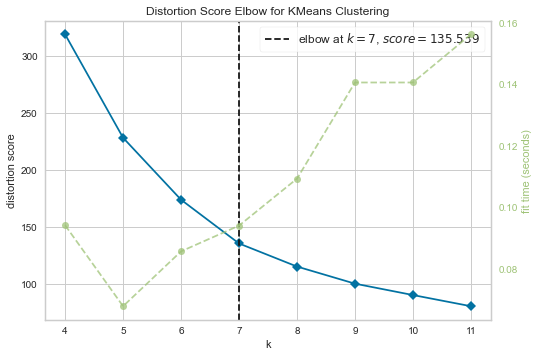

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
model2 = KMeans()
visualizer = KElbowVisualizer(model2, k=(4,12))

visualizer.fit(X_pca)
visualizer.show()


In [80]:
model2 = KMeans(n_clusters = 7)
model2.fit(X_pca)
pred_3 = model2.predict(X_pca)
dataframe['pred_3'] = pred_3

In [81]:
dataframe['pred_3'].value_counts()

0    1485
4    1181
1    1032
3     789
2     661
6     370
5     351
Name: pred_3, dtype: int64

In [97]:
dataframe['artist_name'].unique()

array(['Portishead', 'A Perfect Circle', 'Morphine',
       'Queens of the Stone Age', 'Dierks Bentley', 'Alice In Chains',
       'Björk', 'Dirty Projectors', 'Black Sabbath', 'Low Roar',
       '塞壬唱片-MSR', 'Placebo', 'Testament', 'Faithless', 'R Plus',
       'Maceo Plex', 'Tricky', 'Lonely Guest', 'trentemøller',
       'Radiohead', 'Incubus', 'Hooverphonic', 'Pearl Jam',
       'Groove Armada', 'Dukwa', 'Perry Farrell', 'Archive',
       'Nine Inch Nails', 'HEALTH', 'Coil', 'Massive Attack', 'Moloko',
       'Pink Floyd', 'Jimi Hendrix', 'Motörhead', 'TOOL', 'David Bowie'],
      dtype=object)